In [1]:
!git clone https://github.com/89605502155/ML-repositry.git

Cloning into 'ML-repositry'...
remote: Enumerating objects: 528, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 528 (delta 13), reused 32 (delta 10), pack-reused 492
Receiving objects: 100% (528/528), 57.12 MiB | 34.28 MiB/s, done.
Resolving deltas: 100% (283/283), done.


In [2]:
!pip3 install npls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for npls: filename=npls-0.0.2-py3-none-any.whl size=15706 sha256=6cfef7a5a675ad872387225f1abfa3c565bac1fdcbab0e14b6591409eb5f5bbe
  Stored in directory: /root/.cache/pip/wheels/f2/79/d4/fb9142af0220ae783af3181214b61ed13d8bb19a3b2029ad62
Successfully built npls


In [3]:
import numpy as np
from npls import npls
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, make_scorer
import sklearn

Take data


In [4]:
d=np.load('ML-repositry/fluordata_2021-11-18.npz') #http://models.life.ku.dk/Fluorescence

In [5]:
d.files

['EEM', 'EEM2', 'Em', 'Ex', 'columns', 'Y']

In [13]:
d['Y'].shape

(405, 6)

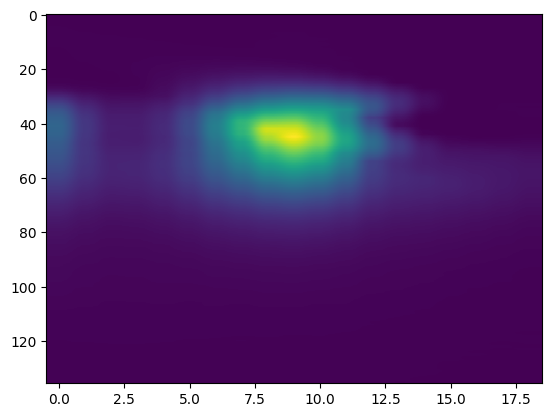

In [11]:
plt.imshow(d['EEM2'][0,:,:],aspect='auto')
plt.show()

In [12]:
def flatten(x):
    sh = x.shape
    return x.reshape(sh[0:len(sh)-1])

Centering fluordata

In [57]:
X=d['EEM2'][:,:,3:]
y=d['Y']
y_pred=list()

In [58]:
X -= X.mean(axis = 0)

In [59]:
y_mean=list()

In [60]:
yyy=y.copy()

In [61]:
for i in range(6):
  print(i)
  y[:,i]*=1e6
  aaa=y[:,i].mean()
  y_mean.append(aaa)
  y[:,i]-=aaa

0
1
2
3
4
5


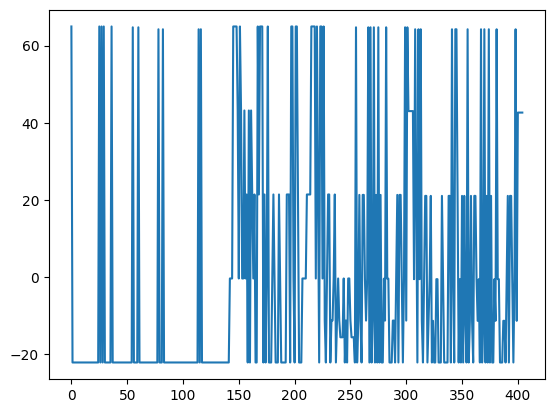

In [78]:
plt.plot(y[:,0])
plt.show()

In [63]:
resoult=list()

0


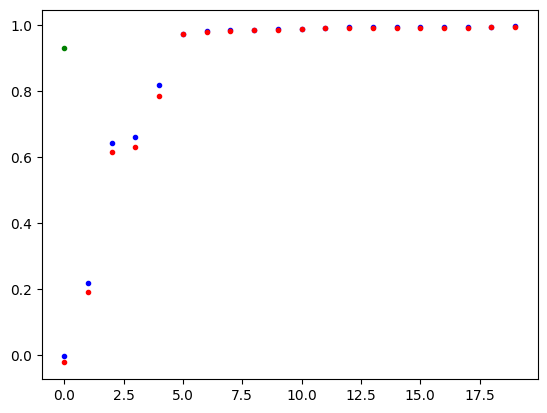

1


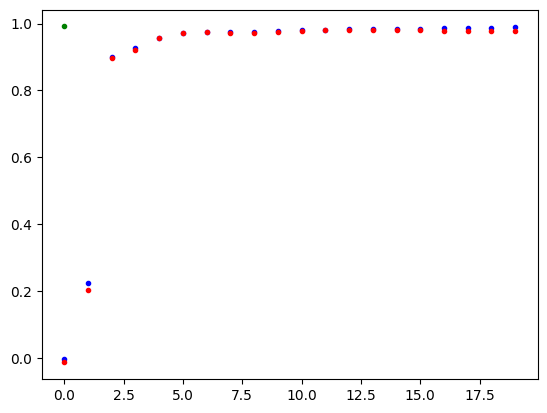

2


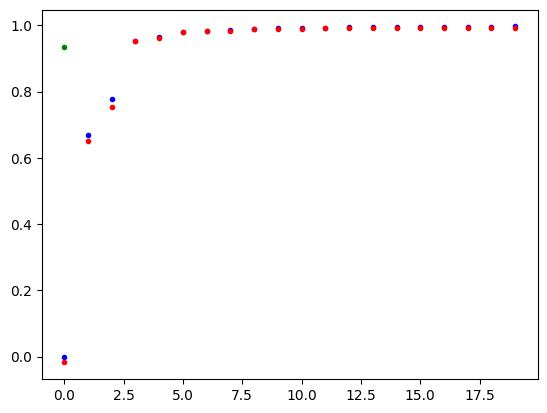

3


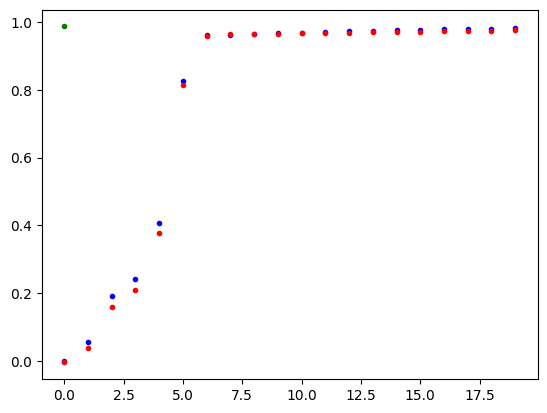

4


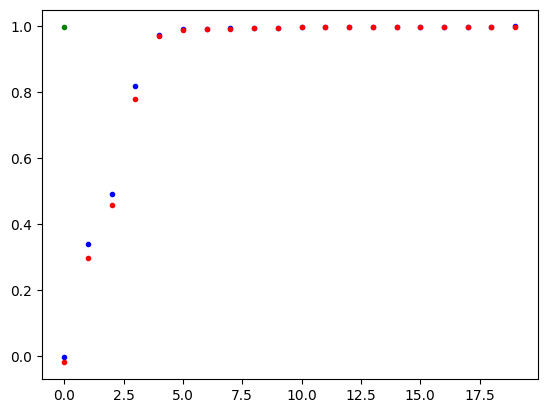

5


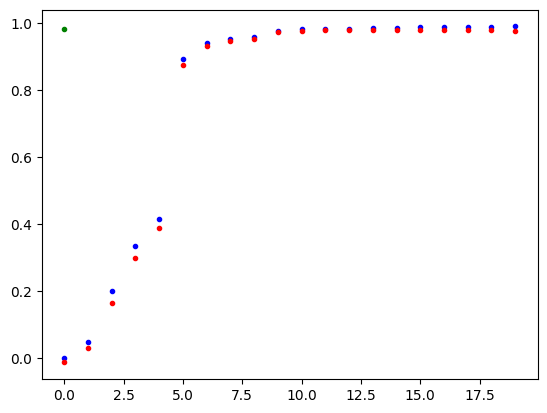

In [64]:
for i in range(6):
  print(i)
  X_train, X_test, y_train, y_test = train_test_split(
    X, y[:,i], test_size=0.1428, random_state=42)
  npls1=npls()
  scoring={'mse': make_scorer(mean_squared_error),'r2':'r2'}
  parametrsNames={'n_components': range(20),
                  # 'a': np.logspace(-2, 0,num = 2)}
                  'a':[1]}
  
  gridCought=GridSearchCV(npls1, parametrsNames, cv=5, scoring=scoring,
                          refit='r2', return_train_score=True)
  gridCought.fit(X_train, y_train)
  r2_p=gridCought.score(X_test, y_test)
  mse_cv=gridCought.cv_results_[ "mean_test_mse" ]
  mse_c=gridCought.cv_results_[ "mean_train_mse" ]
  r2_cv=gridCought.cv_results_[ "mean_test_r2" ]
  r2_c=gridCought.cv_results_[ "mean_train_r2" ]
  resoult.append([gridCought.cv_results_,gridCought.best_params_])
  plt.plot(r2_p,".",color='green')
  plt.plot(r2_c,".",color='blue')
  plt.plot(r2_cv,".",color='red')
  plt.show()

  predictors=gridCought.predict(X)
  y_pred.append(predictors)


In [67]:
resoult[0][0][ "mean_test_r2" ],resoult[0][0][ "mean_test_mse" ]

(array([-0.02156319,  0.19299954,  0.61693392,  0.63229673,  0.78580625,
         0.97373757,  0.98084124,  0.98292533,  0.98501513,  0.98717176,
         0.98849296,  0.99077588,  0.99102092,  0.99196612,  0.9926586 ,
         0.99328615,  0.99349844,  0.99365518,  0.99383664,  0.99384222]),
 array([890.00219063, 696.68943135, 322.7305315 , 309.03813706,
        183.22354893,  22.873402  ,  16.82908161,  14.91082784,
         13.06152116,  11.16020078,   9.97601532,   8.05748764,
          7.80705749,   6.87824392,   6.23688534,   5.75964716,
          5.55880724,   5.43121688,   5.20482757,   5.19247842]))

In [74]:
resoult[5][1]

{'a': 1, 'n_components': 14}

In [75]:
n_com=[18,14,14,18,15,13]

In [79]:
for i in range(6):
  y_pred[i]+=y_mean[i]
  y[:,i]+=y_mean[i]

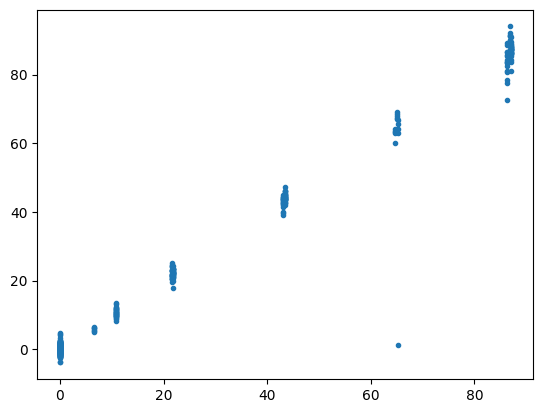

In [81]:
plt.plot(y[:,0],y_pred[0],".")
plt.show()

In [76]:
import matplotlib.gridspec as gridspec

<ipython-input-112-9f235ff1d6f9>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
<ipython-input-112-9f235ff1d6f9>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
<ipython-input-112-9f235ff1d6f9>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
<ipython-input-112-9f235ff1d6f9>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
<ipython-input-112-9f235ff1d6f9>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
<ipython-input-112-9f235ff1d6f9>:70: UserWarning: FixedFormatter 

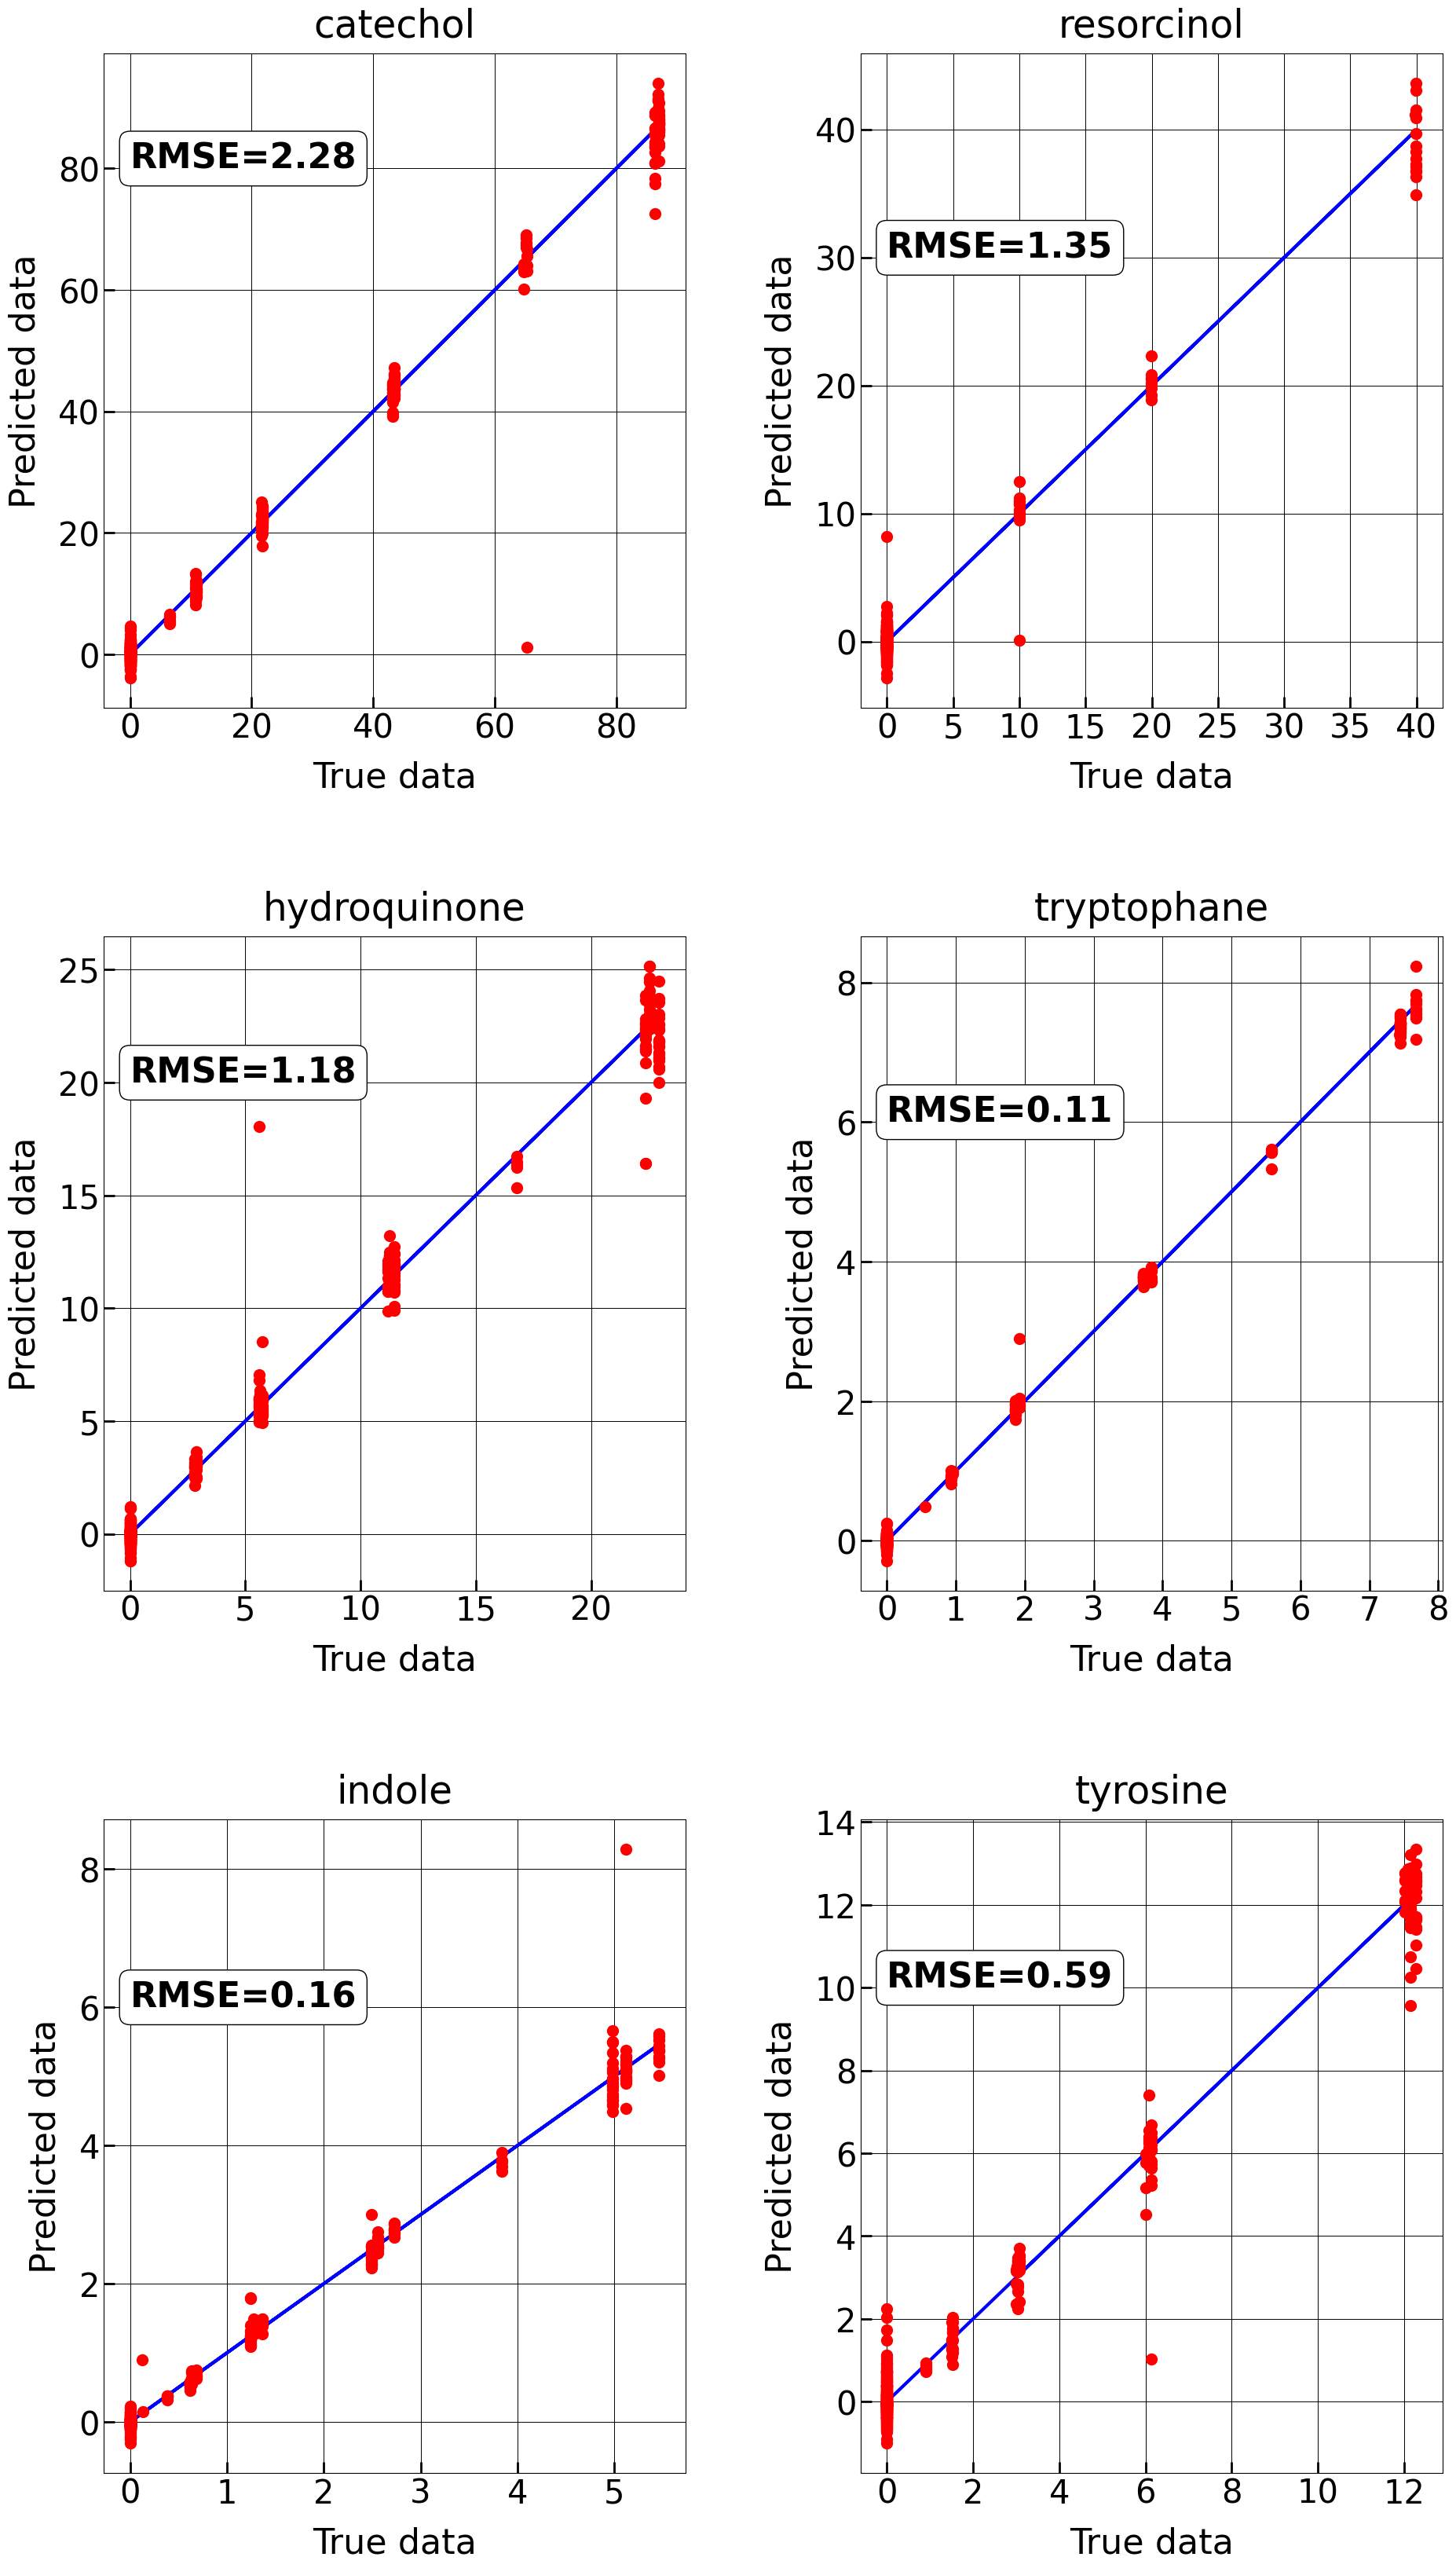

In [112]:
j=0
titLabFont=35
axLabFont=30
axNameLabFont=32
textFontSize=32
fg = plt.figure(figsize=(22, 40),constrained_layout=False)
gs = gridspec.GridSpec(ncols=2, nrows=3, figure=fg)

plt.subplots_adjust(wspace=0.3, hspace=0.35)
# plt.subplots_adjust(hspace=0.3)

fig_ax_1 = fg.add_subplot(gs[0,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("catechol", fontsize=titLabFont,loc="center" ,
                   pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,80,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[1,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("hydroquinone", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,20,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[2,0])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("indole", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,6,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[0,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("resorcinol", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,30,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[1,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("tryptophane", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,6,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1

fig_ax_1 = fg.add_subplot(gs[2,1])
fig_ax_1.plot(y[:,j],y[:,j],color="blue",lw=3)
fig_ax_1.plot(y[:,j],y_pred[j],".",color="red",ms=20)
fig_ax_1.grid(color="black", drawstyle="default", linewidth=0.7)
fig_ax_1.set_xlabel("True data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_ylabel("Predicted data",  fontsize=axNameLabFont,
                    labelpad=15)
fig_ax_1.set_title("tyrosine", fontsize=titLabFont,
                   loc="center" ,pad=15)
fig_ax_1.tick_params(which='major', length=10, width=2)
numStr=np.sqrt(resoult[j][0][ "mean_test_mse" ][n_com[j]]).round(2)
stri='RMSE='+str(numStr)
fig_ax_1.text(0,10,stri, fontsize=textFontSize,fontweight='bold',
              bbox=dict(boxstyle="round",fc='white',ec='black'))
fig_ax_1.set_xticklabels(fig_ax_1.get_xticklabels(), fontsize=axLabFont)
fig_ax_1.set_yticklabels(fig_ax_1.get_yticklabels(), fontsize=axLabFont)
fig_ax_1.get_xaxis().set_tick_params(direction='in')
fig_ax_1.get_yaxis().set_tick_params(direction='in')
j+=1
plt.savefig('Asmund_pr_plots_short.svg',format='svg')
plt.savefig('Asmund_pr_plots_short.pdf',format='pdf',dpi=300)
plt.show();

In [113]:
np.savez('asmund_pr_plot',y=y,y_pred=y_pred,resoult=resoult,n_com=n_com)